Data consists of different Taxi trips around NYC -- includes factors such as cost, distance traveled, Pickup Location, Dropoff Location, Duration, tip, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv ('/Users/alancaldera/Downloads/taxi.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,1,2017-06-09 17:59:37,2017-06-09 18:04:40,1,0.60,1,N,164,234,1,5.0,1.0,0.5,1.02,0.0,0.3,7.82
4,1,2017-06-09 17:59:37,2017-06-09 18:19:26,1,2.80,1,N,229,113,1,14.5,1.0,0.5,3.25,0.0,0.3,19.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302082,2,2017-06-11 23:59:50,2017-06-12 00:04:10,5,1.31,1,N,7,193,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
2302083,2,2017-06-11 23:59:52,2017-06-12 00:11:03,1,3.17,1,N,234,236,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2302084,2,2017-06-11 23:59:58,2017-06-12 00:13:24,1,3.65,1,N,148,17,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2302085,2,2017-06-11 23:59:58,2017-06-12 00:07:21,1,1.01,1,N,230,163,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80


# Section 1

## a) Cleaning data

In [3]:
# Transfer data
q1 = df.copy()

# Make Trip Distance rounded
trip_distance = q1['trip_distance']
rounded_trip_distance = trip_distance.round(0)

# Make duration
dropoff = q1['tpep_dropoff_datetime'].astype('datetime64') 
pickup = q1['tpep_pickup_datetime'].astype('datetime64') 
duration = (dropoff-pickup).dt.total_seconds()

# Final dataframe for a
q_a = pd.DataFrame()
q_a['trip_distance'] = trip_distance
q_a['rounded_trip_distance'] = rounded_trip_distance
q_a['duration'] = duration
q_a

,trip_distance,rounded_trip_distance,duration
0,1.03,1.0,541.0
1,1.03,1.0,342.0
2,5.63,6.0,26793.0
3,0.60,1.0,303.0
4,2.80,3.0,1189.0
...,...,...,...
2302082,1.31,1.0,260.0
2302083,3.17,3.0,671.0
2302084,3.65,4.0,806.0
2302085,1.01,1.0,443.0


## b) Analyzing Velocity by Rounded Trip Distance

In order to visualize fluctuations in velocities with respect to distance.

In [4]:
# Groupby on rounded_trip_distance
q_b = q_a.groupby('rounded_trip_distance').sum()

# Add velocity column
q_b['velocity'] = ((q_b['trip_distance'])/(q_b['duration']))*3600
q_b

,trip_distance,duration,velocity
rounded_trip_distance,,,
0.0,50258.11,39687998.0,4.558789
1.0,864829.59,488994120.0,6.366920
2.0,1074162.26,504729981.0,7.661491
3.0,671211.35,277323439.0,8.713150
4.0,517210.41,183865523.0,10.126735
...,...,...,...
117.0,116.90,8114.0,51.865911
118.0,118.11,7807.0,54.463430
120.0,120.47,10238.0,42.361008


Text(0.5, 1.0, 'Velocity vs Distance')

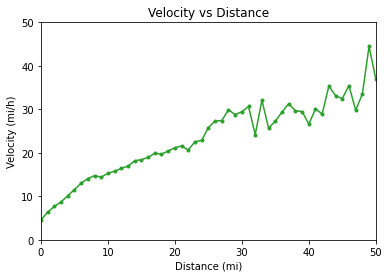

In [8]:
# Plot
plt.plot(q_b,'.-')

#limits
plt.xlim(0,50)
plt.ylim(0,50)

#axis
plt.ylabel('Velocity (mi/h)')
plt.xlabel('Distance (mi)')
plt.title('Velocity vs Distance')

## c) Velocity vs Distance instances without outliers

Text(0.5, 1.0, 'Velocity vs Distance')

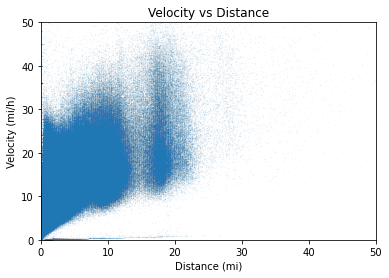

In [7]:
# Copy
q_c = q_a.copy()

# Velocity column
q_c['velocity'] = (q_c['trip_distance'] / q_c['duration'])*3600

# Filter out high velocities and no duration
q_c[(q_c['duration']>0) & (q_c['velocity']<100)]

# Set Velocity and Distance up to 50 each
q_c = q_c[(q_c['trip_distance']<=50) & (q_c['velocity']<=50)]

# Plot
plt.plot(q_c['trip_distance'], q_c['velocity'],'.',markersize=.05)
plt.xlim(0,50)
plt.ylim(0,50)
plt.ylabel('Velocity (mi/h)')
plt.xlabel('Distance (mi)')
plt.title('Velocity vs Distance')

# Section 2

Calculating most common pre-tip amounts for 'medium' length Taxi fares

In [251]:
q2 = pd.DataFrame()

# Make pre-tip amount in data set
q2['pre_tip'] = df['total_amount'] - df['tip_amount']

# Round to nearest 10 cents
q2['pre_tip'] = q2['pre_tip'].round(1)

# Filter to wanted amounts
q2 = q2[(q2['pre_tip']>=30) & (q2['pre_tip']<=70)]

# Find top 3 most common pre-tip amounts
q2['pre_tip'].value_counts().head(3)

58.6    29106
52.8    13009
63.1     7107
Name: pre_tip, dtype: int64

Top 3 pre-tip amounts alongside corresponding # of records:

--------------------------------
| Amount | # of records    |
|--------|-----------------|
|   58.6 |     29106       |
|   52.8 |     13009       |
|   63.1 |     7107        |


# Section 3

Seeing how velocity differs during the time of day / night for Monday - Friday for trips under 1 hour long in order to see just how much more drivers speed at night. 

Text(0.5, 1.0, 'Velocity vs Time of day for Monday - Friday averages')

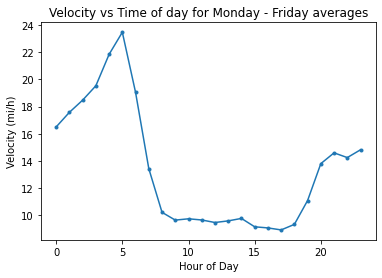

In [8]:
q3 = df.copy()

# Get duration
dropoff = q3['tpep_dropoff_datetime'].astype('datetime64') 
pickup = q3['tpep_pickup_datetime'].astype('datetime64') 
duration = (dropoff-pickup).dt.total_seconds()
q3['duration'] = duration

# Get hour of day and day of week
q3['hourofday'] = df['tpep_dropoff_datetime'].astype('datetime64').dt.hour 
q3['dayofweek'] = df['tpep_dropoff_datetime'].astype('datetime64').dt.dayofweek

# Filter
q3 = q3[(q3['duration']<3600) & (q3['dayofweek']<5)]

# Groupby hour of day
q3 = q3.groupby(by='hourofday').sum()

# Create velocity
q3['velocity'] = (q3['trip_distance'] / q3['duration'])*3600

# Plot
plt.plot(q3['velocity'],'.-')

#axis
plt.ylabel('Velocity (mi/h)')
plt.xlabel('Hour of Day')
plt.title('Velocity vs Time of day for Monday - Friday averages')

It has this shape because almost no one is driving on the road during the high velocity hours (early morning and late night / after rush hour) so more people are likely to speed since there is less traffic and are less likely to be caught by a cop.

# Section 4

Used secondary dataset in order to find which boroughs had highest amount of volume in trips internally and externally.

## a) Boroughs in NYC with most amount of taxi trips

In [254]:
# Import and initialize
q4_data = pd.read_csv ('/Users/alancaldera/Downloads/taxi_zone_lookup.csv')
q4 = df.copy()
q4_data

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [276]:
# Join datasets
joined = q4.join(q4_data.set_index('LocationID'), on='PULocationID', how='left')

# Calculate pickups by Borough
joined = joined['Borough'].value_counts()

# Dataframe
df_q4 = joined.rename_axis('Boroughs').reset_index(name='Trips')

df_q4

,Boroughs,Trips
0,Manhattan,2085050
1,Queens,143578
2,Brooklyn,37162
3,Unknown,34065
4,Bronx,2031
5,EWR,173
6,Staten Island,28


## b) Boroughs with most amount of interborough trips

In [304]:
# Join PULocation
joined2 = q4.join(q4_data.set_index('LocationID'), on='PULocationID', how='left')
joined2.rename(columns = {'Borough' : 'PUBorough'}, inplace = True)

# Keep PUBorough column
joined3 = joined2['PUBorough']

# Join DOLocation
joined2 = q4.join(q4_data.set_index('LocationID'), on='DOLocationID', how='left')
joined2.rename(columns = {'Borough' : 'DOBorough'}, inplace = True)

# Reattach PUBorough column
joined2['PUBorough'] = joined3

# Filter for different boroughs
joined4 = joined2[joined2['PUBorough'] != joined2['DOBorough']]

# For nicer viewing at end
joined4 = joined4[['PUBorough','DOBorough']]

# count instances for each PUBorough
joined4 = joined4.groupby('PUBorough').count()

# Change for formatting 
joined4.rename(columns = {'DOBorough' : 'Count'}, inplace = True)

# Output
joined4

,Count
PUBorough,
Bronx,850
Brooklyn,12469
EWR,9
Manhattan,160524
Queens,106294
Staten Island,6
Unknown,5908


# Statistical Analysis of Miscellaneous Data

## a) Table

In [236]:
q_5 = pd.DataFrame(np.random.normal(size=(10000 ,2)), columns=['x','y'])
q_5['z'] = (2*q_5['x']) + q_5['y']
q_5

,x,y,z
0,-0.231717,-1.224993,-1.688426
1,-1.212692,0.940640,-1.484744
2,0.493274,0.377624,1.364171
3,1.176010,-0.147271,2.204748
4,0.327450,-0.509145,0.145756
...,...,...,...
9995,1.018608,1.127005,3.164222
9996,-0.232701,-0.774976,-1.240379
9997,-1.448152,1.847592,-1.048711
9998,-0.958083,-1.301739,-3.217905


## b) Covariance calculating function

In [238]:
def mycov(df, col_name_1, col_name_2):
    # for z and x it should be 2 as n -> inf
    part1 = (q_5[col_name_1]*q_5[col_name_2]).mean()
    part2 = (q_5[col_name_1].mean())*(q_5[col_name_2].mean())
    part3 = part1 - part2
    return part3

In [243]:
mycov(q_5, 'z', 'x')

2.0182557167603514

### Should be close to 2 ^

## c) Covariance of independent variables

In [248]:
mycov(q_5, 'y', 'x')

-0.0012955342435938856

### It should be approaching value of 0 since Var(X,Y) is 0 because X and Y are independent

## d) Plots

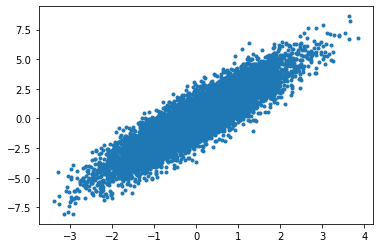

In [246]:
plt.plot(q_5['x'],q_5['z'],'.')

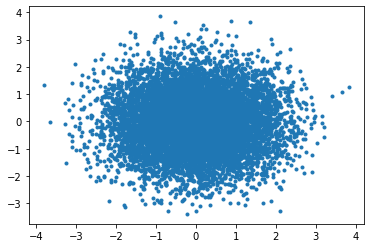

In [247]:
plt.plot(q_5['y'],q_5['x'],'.')